<a href="https://colab.research.google.com/github/c3rssei/covid19care/blob/master/Previsualizacion_movilizacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2> Datasets </h2>

<ol>
<li>https://github.com/MinCiencia/Datos-COVID19</li>
<li>Google Mobility https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv</li>
<li><a href="https://covid19.soporta.cl/datasets/05cb8cd004ca41768307623d607e7334_0?geometry=-175.959%2C-59.961%2C51.678%2C-13.721&showData=true">Colección de Recursos COVID-19 Chile </a></li>
</ol>



<h3> Descubrir y visualizar la data</h3>

Estudiar cada atributo y sus caracteristicas:

<ul>
<li>Nombre</li>

<li>Tipo de dato (Int, Float, Object, Bool..)</li>

<li>% de valores perdidos</li>

<li>Posiblemente útil para la tarea?</li>

<li>Tipo de distribución (gaussiana, uniforme, logarítmica, etc.)</li>





In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [64]:
google_mobility = pd.read_csv("https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=94537edba4db1128")
casos_por_comuna = pd.read_csv('https://raw.githubusercontent.com/MinCiencia/Datos-COVID19/master/output/producto25/CasosActualesPorComuna.csv')


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.



In [65]:
casos_por_comuna.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 40 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Region         378 non-null    object 
 1   Codigo region  378 non-null    int64  
 2   Comuna         378 non-null    object 
 3   Codigo comuna  346 non-null    float64
 4   Poblacion      362 non-null    float64
 5   2020-04-13     362 non-null    float64
 6   2020-04-15     362 non-null    float64
 7   2020-04-17     362 non-null    float64
 8   2020-04-20     362 non-null    float64
 9   2020-04-24     362 non-null    float64
 10  2020-04-27     362 non-null    float64
 11  2020-05-01     362 non-null    float64
 12  2020-05-04     362 non-null    float64
 13  2020-05-08     362 non-null    float64
 14  2020-05-11     362 non-null    float64
 15  2020-05-15     362 non-null    float64
 16  2020-05-18     362 non-null    float64
 17  2020-05-22     362 non-null    float64
 18  2020-05-25

In [66]:
casos_por_comuna.head()

,Region,Codigo region,Comuna,Codigo comuna,Poblacion,2020-04-13,2020-04-15,2020-04-17,2020-04-20,2020-04-24,2020-04-27,2020-05-01,2020-05-04,2020-05-08,2020-05-11,2020-05-15,2020-05-18,2020-05-22,2020-05-25,2020-05-29,2020-06-01,2020-06-05,2020-06-08,2020-06-12,2020-06-15,2020-06-19,2020-06-23,2020-06-28,2020-07-01,2020-07-05,2020-07-10,2020-07-13,2020-07-17,2020-07-20,2020-07-24,2020-07-27,2020-07-31,2020-08-03,2020-08-07,2020-08-10
0,Arica y Parinacota,15,Arica,15101.0,247552.0,88.0,81.0,74.0,66.0,79.0,103.0,106.0,88.0,62.0,66.0,49.0,68.0,117.0,143.0,163.0,177.0,248.0,278.0,328.0,353.0,359.0,382.0,408.0,406.0,496.0,577.0,657.0,819.0,864.0,987.0,991.0,965.0,865.0,711.0,782.0
1,Arica y Parinacota,15,Camarones,15102.0,1233.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,12.0,12.0,7.0,2.0,2.0,6.0,5.0,5.0
2,Arica y Parinacota,15,General Lagos,15202.0,810.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,5.0
3,Arica y Parinacota,15,Putre,15201.0,2515.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,8.0,7.0,1.0,1.0,1.0,15.0,17.0,15.0,12.0,7.0,7.0,3.0,1.0,10.0,15.0
4,Arica y Parinacota,15,Desconocido Arica y Parinacota,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,0.0,0.0,1.0,1.0,3.0,3.0,4.0,4.0,6.0,8.0,7.0,12.0


In [67]:
google_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


In [68]:
google_mobility.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1777581 entries, 0 to 1777580
Data columns (total 14 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   date                                                object 
 8   retail_and_recreation_percent_change_from_baseline  float64
 9   grocery_and_pharmacy_percent_change_from_baseline   float64
 10  parks_percent_change_from_baseline                  float64
 11  transit_stations_percent_change_from_

In [69]:
#solo chile
chile_mobility = google_mobility[google_mobility["country_region"]=="Chile"]

In [70]:
chile_mobility.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
502204,CL,Chile,NaN,NaN,NaN,NaN,NaN,2020-02-15,2.0,4.0,9.0,0.0,-3.0,0.0
502205,CL,Chile,NaN,NaN,NaN,NaN,NaN,2020-02-16,3.0,5.0,5.0,4.0,-1.0,0.0
502206,CL,Chile,NaN,NaN,NaN,NaN,NaN,2020-02-17,1.0,6.0,11.0,-3.0,-8.0,1.0
502207,CL,Chile,NaN,NaN,NaN,NaN,NaN,2020-02-18,0.0,5.0,13.0,-3.0,-7.0,1.0
502208,CL,Chile,NaN,NaN,NaN,NaN,NaN,2020-02-19,0.0,8.0,11.0,-3.0,-7.0,1.0


In [71]:
chile_mobility.describe(include="object")

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,date
count,12509,12509,12332,9500,0,2832,12509
unique,1,1,16,54,0,16,177
top,CL,Chile,Valparaíso,Cordillera Province,NaN,CL-LI,2020-05-17
freq,12509,12509,1559,177,NaN,177,71


In [72]:
# high unique values y nan only
chile_mobility.drop("country_region",axis=1,inplace=True)
chile_mobility.drop("sub_region_2",axis=1,inplace=True)
chile_mobility.drop('metro_area',axis=1,inplace=True)
chile_mobility.drop('iso_3166_2_code',axis=1,inplace=True)
chile_mobility.drop('census_fips_code',axis=1,inplace=True)
chile_mobility.drop('country_region_code',axis=1,inplace=True)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
#Elimino las filas que no entregan informacion sobre la sub region a la que pertenecen

nulos = chile_mobility["sub_region_1"].isnull()
chile_mobility[nulos].describe(include="all") #No existe nada que me permita descifrar a que region corresponden por ende las borro

chile_mobility.dropna(subset=["sub_region_1"],inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [74]:
#Como cada fecha es una atributo por si solo, lo llevo a uno solo (date) para coincidir con el dataset de google
chilean_data= pd.melt(casos_por_comuna,id_vars=["Region"],
                     value_vars=casos_por_comuna.columns[5:,],
                     var_name="Date",
                     value_name="Casos")

In [75]:
chilean_data.head()

,Region,Date,Casos
0,Arica y Parinacota,2020-04-13,88.0
1,Arica y Parinacota,2020-04-13,0.0
2,Arica y Parinacota,2020-04-13,0.0
3,Arica y Parinacota,2020-04-13,0.0
4,Arica y Parinacota,2020-04-13,NaN


In [76]:
chilean_data.pivot_table(index="Date",columns="Region",values="Casos",aggfunc="sum")

Region,Antofagasta,Arica y Parinacota,Atacama,Aysen,Biobio,Coquimbo,Del Libertador General Bernardo O’Higgins,La Araucania,Los Lagos,Los Rios,Magallanes y la Antartica,Maule,Metropolitana,Nuble,Tarapaca,Valparaiso
Date,,,,,,,,,,,,,,,,
2020-04-13,158.0,176.0,18.0,4.0,460.0,38.0,18.0,554.0,262.0,100.0,430.0,98.0,3252.0,380.0,60.0,176.0
2020-04-15,178.0,162.0,18.0,0.0,352.0,38.0,18.0,476.0,186.0,74.0,370.0,96.0,3114.0,280.0,70.0,166.0
2020-04-17,208.0,148.0,18.0,0.0,294.0,28.0,18.0,420.0,160.0,64.0,366.0,234.0,3784.0,222.0,76.0,204.0
2020-04-20,262.0,132.0,14.0,0.0,264.0,28.0,18.0,478.0,132.0,50.0,378.0,334.0,4090.0,164.0,84.0,216.0
2020-04-24,360.0,158.0,14.0,0.0,304.0,18.0,58.0,480.0,102.0,36.0,300.0,374.0,4560.0,156.0,122.0,222.0
2020-04-27,424.0,206.0,28.0,0.0,256.0,22.0,70.0,424.0,100.0,32.0,258.0,304.0,5476.0,136.0,150.0,206.0
2020-05-01,508.0,212.0,52.0,0.0,172.0,22.0,102.0,354.0,98.0,30.0,194.0,128.0,8246.0,102.0,154.0,320.0
2020-05-04,698.0,176.0,94.0,0.0,150.0,52.0,118.0,274.0,102.0,40.0,232.0,84.0,12076.0,118.0,290.0,352.0
2020-05-08,758.0,124.0,100.0,2.0,234.0,76.0,144.0,254.0,106.0,30.0,300.0,88.0,16546.0,90.0,546.0,610.0


In [77]:
#Debo hacer coincidir los nombres de las regiones de ambos datasets
chile_mobility["sub_region_1"].value_counts()

Valparaíso                           1559
Santiago Metropolitan Region         1239
Maule                                 885
Los Lagos                             885
Aysén                                 867
Atacama                               708
O'Higgins                             708
Antofagasta                           708
Ñuble                                 708
Coquimbo                              708
Bio Bio                               708
Magallanes and Chilean Antarctica     702
Araucania                             531
Tarapacá                              531
Los Ríos                              531
Arica y Parinacota                    354
Name: sub_region_1, dtype: int64

In [78]:
chilean_data["Region"].value_counts()

Metropolitana                                1890
Valparaiso                                   1400
Del Libertador General Bernardo O’Higgins    1225
Biobio                                       1225
La Araucania                                 1190
Maule                                        1120
Los Lagos                                    1120
Nuble                                         805
Coquimbo                                      595
Los Rios                                      490
Magallanes y la Antartica                     455
Aysen                                         420
Atacama                                       385
Antofagasta                                   385
Tarapaca                                      315
Arica y Parinacota                            210
Name: Region, dtype: int64

In [79]:
regiones ={"sub_region_1":{"Santiago Metropolitan Region":"Metropolitana","O'Higgins":"Del Libertador General Bernardo O’Higgins","Aysén":"Aysen","Araucania":"La Araucania","Bio Bio":"Biobio","Ñuble":"Nuble","Magallanes and Chilean Antarctica":"Magallanes y la Antartica","Los Ríos":"Los Rios","Tarapacá":"Tarapaca","Valparaíso":"Valparaiso"}}
chile_mobility.replace(regiones,inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6666: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [80]:
#Atributos con los mismos nombres
chile_mobility.rename(columns={"sub_region_1":"Region","date":"Date"},inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [81]:
#Concat
''' fail
test1=pd.concat([chilean_data,chile_mobility])
test1.info()
'''

test1=pd.merge(chile_mobility,chilean_data,how="right")
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64120 entries, 0 to 64119
Data columns (total 9 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   Region                                              64120 non-null  object 
 1   Date                                                64120 non-null  object 
 2   retail_and_recreation_percent_change_from_baseline  58787 non-null  float64
 3   grocery_and_pharmacy_percent_change_from_baseline   57677 non-null  float64
 4   parks_percent_change_from_baseline                  63622 non-null  float64
 5   transit_stations_percent_change_from_baseline       58038 non-null  float64
 6   workplaces_percent_change_from_baseline             61313 non-null  float64
 7   residential_percent_change_from_baseline            53828 non-null  float64
 8   Casos                                               62725 non-null  float64
d

In [82]:
missing = test1.isnull().sum()*100/len(test1)
miss = pd.DataFrame({"Columnas":test1.columns,
                     "% Nulos":missing}) 
miss.sort_values("% Nulos",ascending=False,inplace=True)
miss

,Columnas,% Nulos
residential_percent_change_from_baseline,residential_percent_change_from_baseline,16.051154
grocery_and_pharmacy_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,10.048347
transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline,9.485340
retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_base...,8.317218
workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline,4.377729
Casos,Casos,2.175608
parks_percent_change_from_baseline,parks_percent_change_from_baseline,0.776669
Region,Region,0.000000
Date,Date,0.000000


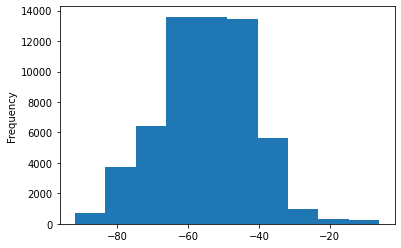

In [83]:
test1["retail_and_recreation_percent_change_from_baseline"].plot(kind="hist") #Simetrica? o mejor relleno por grupos

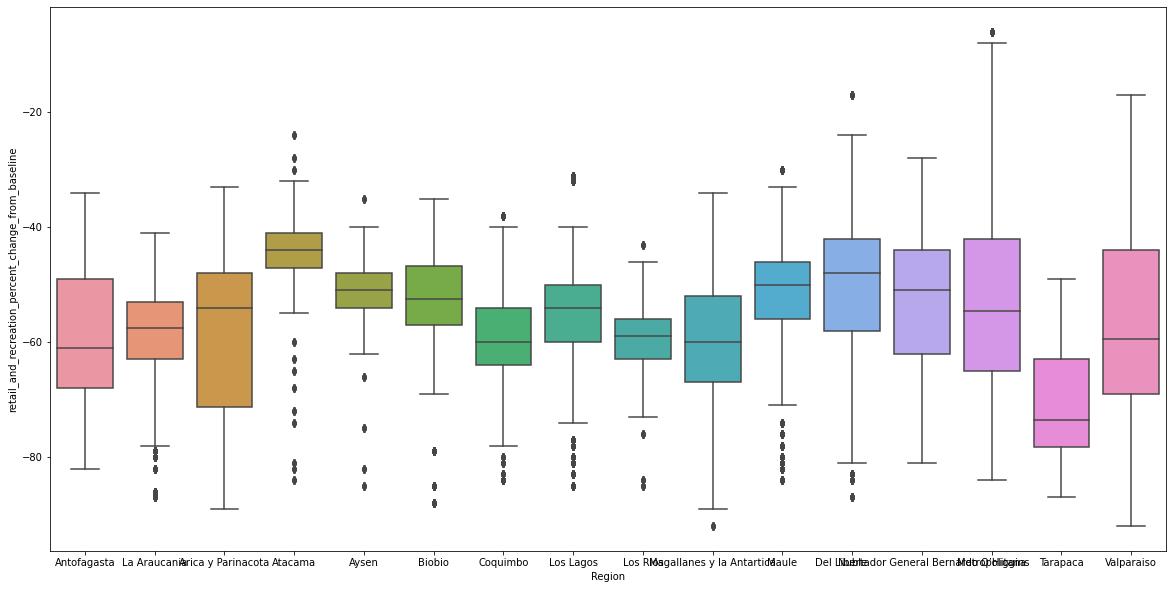

In [84]:
#Movilizacion segun categoria.
fig,ax=plt.subplots(figsize=(20, 10))
sns.boxplot("Region","retail_and_recreation_percent_change_from_baseline",data=test1)
plt.show()

In [85]:
'''
#Seleccion solo la data de "retail_and_recreation_percent_change_from_baseline" y la agrupo por regiones

aux = test1.groupby("Region")["retail_and_recreation_percent_change_from_baseline"]

#Se rellenan los valores nulos con el promedio de la categoria por region
test1["retail_and_recreation_percent_change_from_baseline"].fillna(aux.transform("mean"),inplace=True)
'''


columns = test1.columns[2:8,]

def relleno(columns):
  for i in columns:
    print("Columna fillna: ",i)
    aux=test1.groupby("Region")[i]
    test1[i].fillna(aux.transform("mean"),inplace=True)

relleno(columns)

Columna fillna:  retail_and_recreation_percent_change_from_baseline
Columna fillna:  grocery_and_pharmacy_percent_change_from_baseline
Columna fillna:  parks_percent_change_from_baseline
Columna fillna:  transit_stations_percent_change_from_baseline
Columna fillna:  workplaces_percent_change_from_baseline
Columna fillna:  residential_percent_change_from_baseline


In [86]:
test1.groupby("Region")[columns].mean()


,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
Region,,,,,,
Antofagasta,-58.705882,-45.490196,-60.301471,-56.014706,-34.470588,22.647059
Arica y Parinacota,-59.941176,-40.455882,-69.073529,-58.205882,-37.073529,21.750000
Atacama,-45.007463,-32.794118,-49.551471,-61.595588,-20.794118,21.343434
Aysen,-51.855072,-27.600000,-60.094675,-73.867647,-17.892157,18.564516
Biobio,-52.632353,-35.014706,-58.669118,-59.080882,-28.220588,20.669118
Coquimbo,-58.625000,-42.779412,-62.000000,-58.088235,-29.772059,20.090226
Del Libertador General Bernardo O’Higgins,-53.345588,-42.507353,-54.382353,-56.279279,-27.919118,21.803922
La Araucania,-59.029412,-41.343137,-59.931373,-61.450980,-33.735294,23.598039
Los Lagos,-55.742647,-43.139706,-62.005882,-59.247059,-28.628931,21.669118


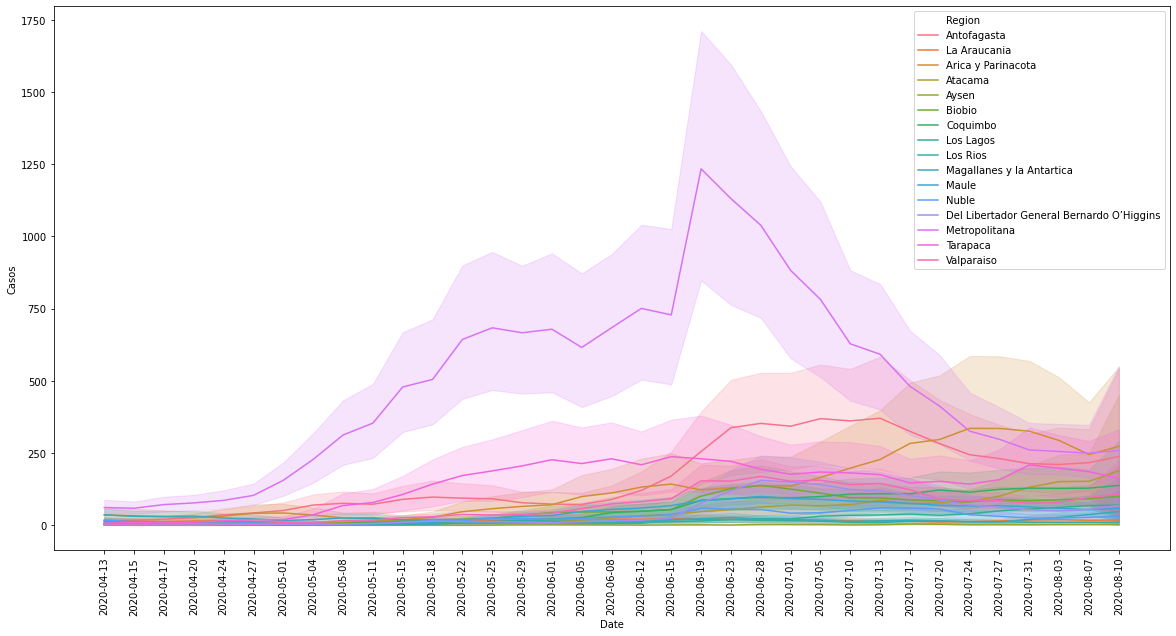

In [87]:
#Como varian los casos de contagiados Segun la region
fig,ax=plt.subplots(figsize=(20, 10))
sns.lineplot(x="Date",y="Casos",hue="Region",data=test1)

plt.xticks(rotation=90)
plt.show()


In [88]:
test1.head()

,Region,Date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,Casos
0,Antofagasta,2020-04-13,-51.000000,-38.000000,-58.0,-52.0,-35.0,19.000000,50.0
1,Antofagasta,2020-04-13,-55.000000,-45.000000,-59.0,-49.0,-37.0,19.000000,50.0
2,Antofagasta,2020-04-13,-50.000000,-35.000000,-64.0,-63.0,-30.0,19.000000,50.0
3,Antofagasta,2020-04-13,-58.705882,-45.490196,-34.0,-31.0,-21.0,22.647059,50.0
4,Antofagasta,2020-04-13,-51.000000,-38.000000,-58.0,-52.0,-35.0,19.000000,12.0


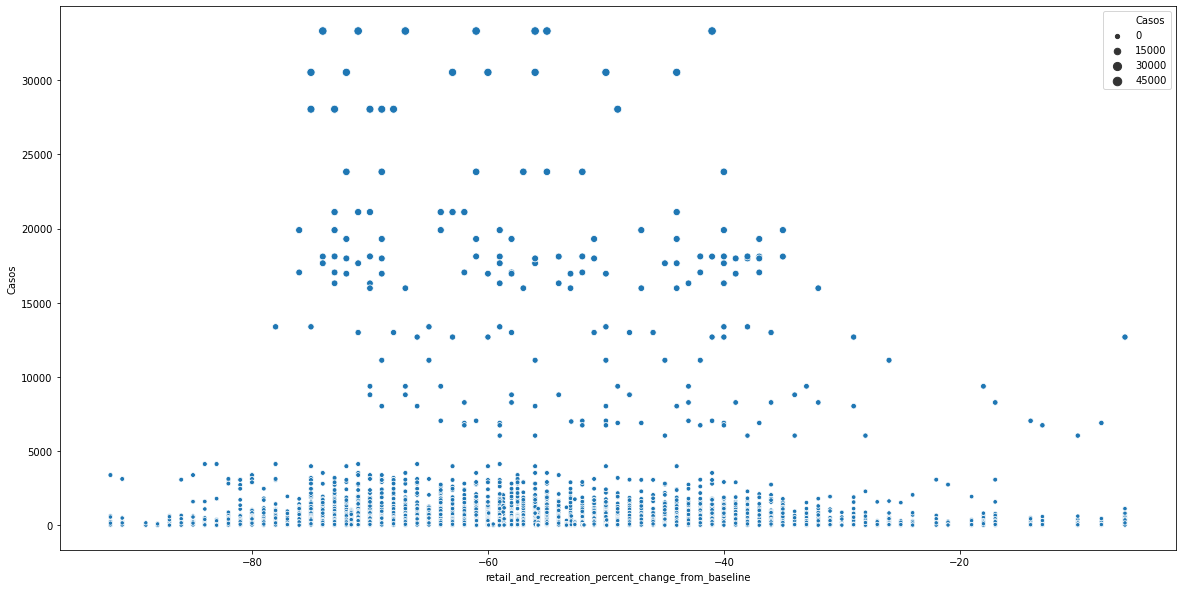

In [89]:
'''
Como varian los contagios segun cada categoria de movilizacion

retail_and_recreation_percent_change_from_baseline
grocery_and_pharmacy_percent_change_from_baseline
parks_percent_change_from_baseline
transit_stations_percent_change_from_baseline
workplaces_percent_change_from_baseline
residential_percent_change_from_baseline

'''
fig,ax=plt.subplots(figsize=(20, 10))
sns.scatterplot(y="Casos",x="retail_and_recreation_percent_change_from_baseline",size="Casos",data=test1,palette='Spectral')


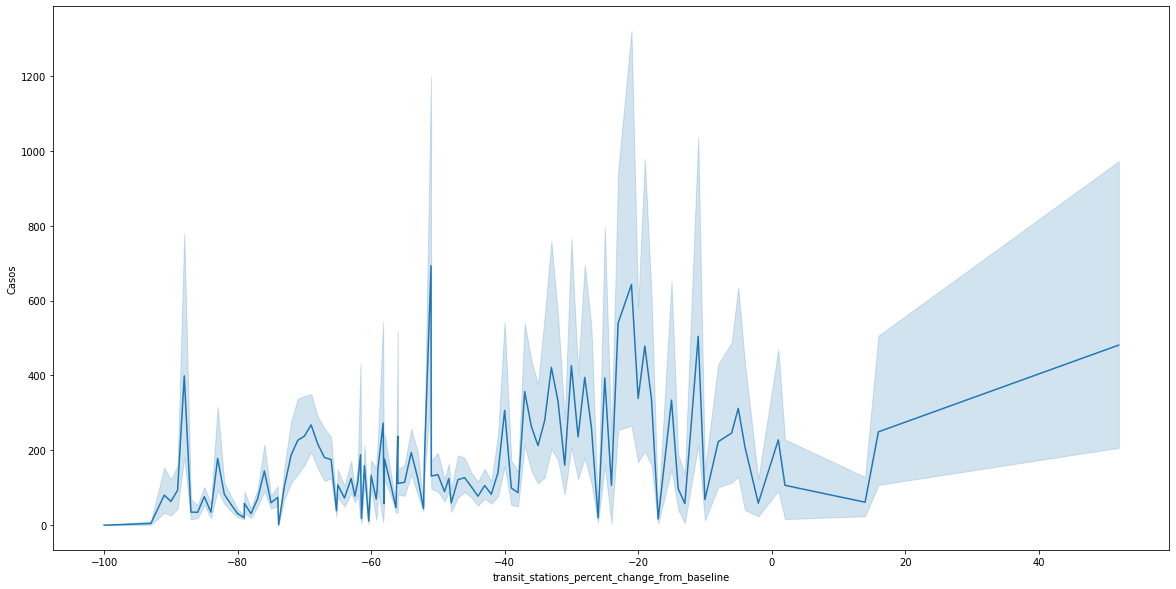

In [90]:
fig,ax=plt.subplots(figsize=(20, 10))
sns.lineplot(y="Casos",x="transit_stations_percent_change_from_baseline",data=test1)
plt.show()

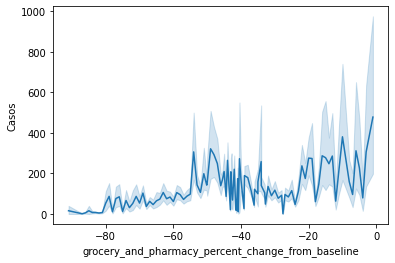

In [91]:
sns.lineplot(y="Casos",x="grocery_and_pharmacy_percent_change_from_baseline",data=test1)
plt.show()

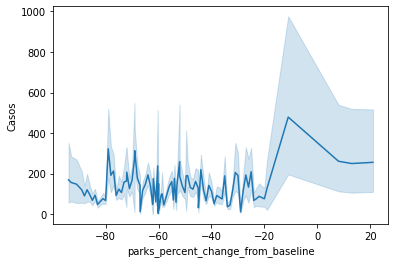

In [92]:
sns.lineplot(y="Casos",x="parks_percent_change_from_baseline",data=test1)
plt.show()

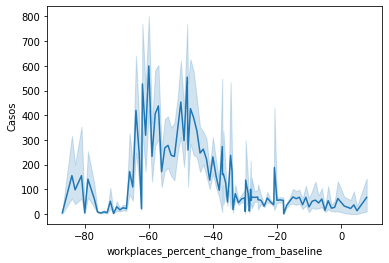

In [93]:
sns.lineplot(y="Casos",x="workplaces_percent_change_from_baseline",data=test1)
plt.show()

In [94]:
#nuevo atributo %Poblacion

#Agrupo los datos de casos por comuna segun la region y sumo las respectivas poblacion, se aplica reset_index para queda en forma de dataframe tradicional
aux = casos_por_comuna.groupby("Region")["Poblacion"].sum().reset_index()

#Aplico loc para realizar la busqueda, lo cual me entrega una serie con el indice y los casos
for i in aux["Region"]:
  #casos=test1.loc[test["Region"]==i,"Casos"]
  pob=aux.loc[aux["Region"]==i,"Poblacion"]
  test1.loc[(test1.Region==i),"Poblacion"]= pob.item()
  

#test1["%Poblacion"]=100*test1["Casos"]/casos_por_comuna.groupby("Region")["Poblacion"].transform("sum")

In [95]:
#Check 
aux

,Region,Poblacion
0,Antofagasta,1383708.0
1,Arica y Parinacota,504220.0
2,Atacama,629418.0
3,Aysen,214594.0
4,Biobio,3327392.0
5,Coquimbo,1672192.0
6,Del Libertador General Bernardo O’Higgins,1982126.0
7,La Araucania,2028686.0
8,Los Lagos,1782880.0
9,Los Rios,811670.0


In [96]:
test1.groupby("Region")["Poblacion"].mean()

Region
Antofagasta                                   1383708.0
Arica y Parinacota                             504220.0
Atacama                                        629418.0
Aysen                                          214594.0
Biobio                                        3327392.0
Coquimbo                                      1672192.0
Del Libertador General Bernardo O’Higgins     1982126.0
La Araucania                                  2028686.0
Los Lagos                                     1782880.0
Los Rios                                       811670.0
Magallanes y la Antartica                      356724.0
Maule                                         2263878.0
Metropolitana                                16250144.0
Nuble                                         1023102.0
Tarapaca                                       765546.0
Valparaiso                                    3920340.0
Name: Poblacion, dtype: float64

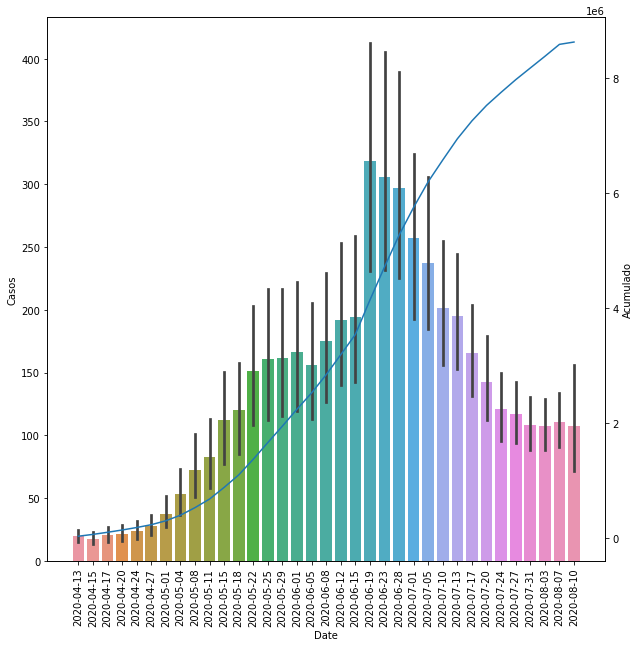

In [97]:
AcumCasos= test1.groupby("Date")["Casos"].sum().reset_index()
AcumCasos["Acumulado"]=AcumCasos["Casos"].cumsum()


fig,ax=plt.subplots(figsize=(10, 10))
ax=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax1=ax.twinx()
ax1=sns.lineplot(y="Acumulado",x="Date",data=AcumCasos)


In [98]:
#Una vez agregada la poblacion al dataframe calculo el porcentaje de casos segun poblacion

test1["Casos_Pob"] = test1["Casos"]*100 / test1["Poblacion"]

In [110]:
test1["Casos_Pob"].head(20)

0     0.003613
1     0.003613
2     0.003613
3     0.003613
4     0.000867
5     0.000867
6     0.000867
7     0.000867
8     0.000072
9     0.000072
10    0.000072
11    0.000072
12    0.000795
13    0.000795
14    0.000795
15    0.000795
16    0.000000
17    0.000000
18    0.000000
19    0.000000
Name: Casos_Pob, dtype: float64

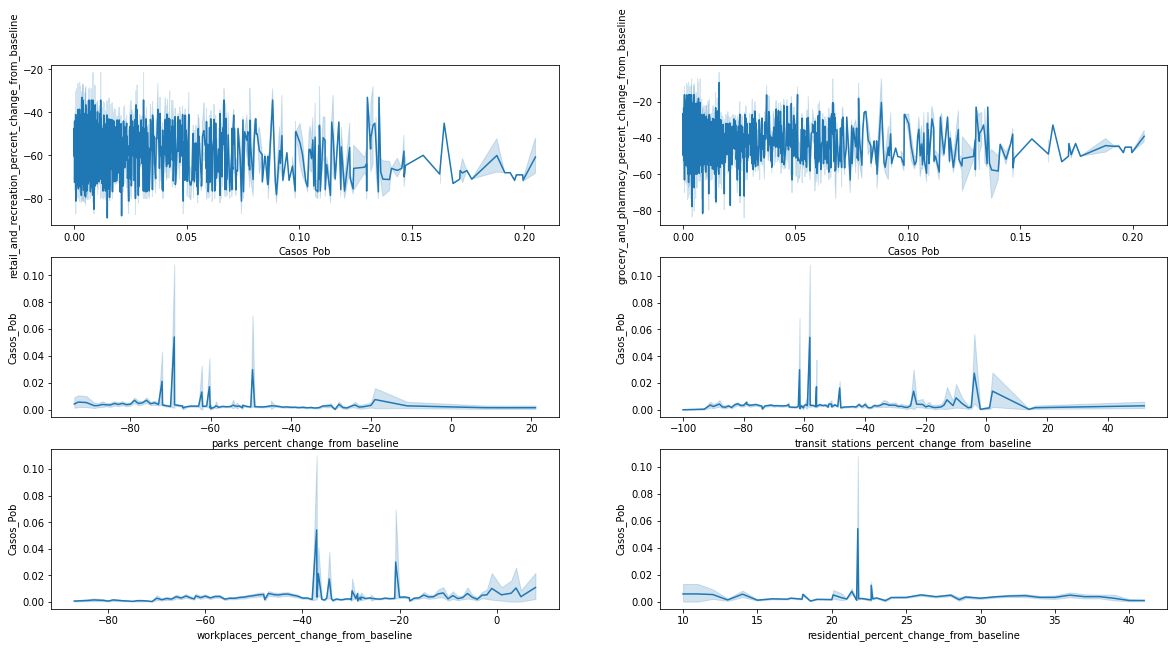

In [108]:
#Variacion de casos por total de poblacion segun movilizacion
fig,ax=plt.subplots(figsize=(20, 10))
plt.subplot(3,2,1)
sns.lineplot(x="Casos_Pob",y="retail_and_recreation_percent_change_from_baseline",data=test1)
plt.subplot(3,2,2)
sns.lineplot(x="Casos_Pob",y="grocery_and_pharmacy_percent_change_from_baseline",data=test1)
plt.subplot(3,2,3)
sns.lineplot(y="Casos_Pob",x="parks_percent_change_from_baseline",data=test1)
plt.subplot(3,2,4)
sns.lineplot(y="Casos_Pob",x="transit_stations_percent_change_from_baseline",data=test1)
plt.subplot(3,2,5)
sns.lineplot(y="Casos_Pob",x="workplaces_percent_change_from_baseline",data=test1)
plt.subplot(3,2,6)
sns.lineplot(y="Casos_Pob",x="residential_percent_change_from_baseline",data=test1)

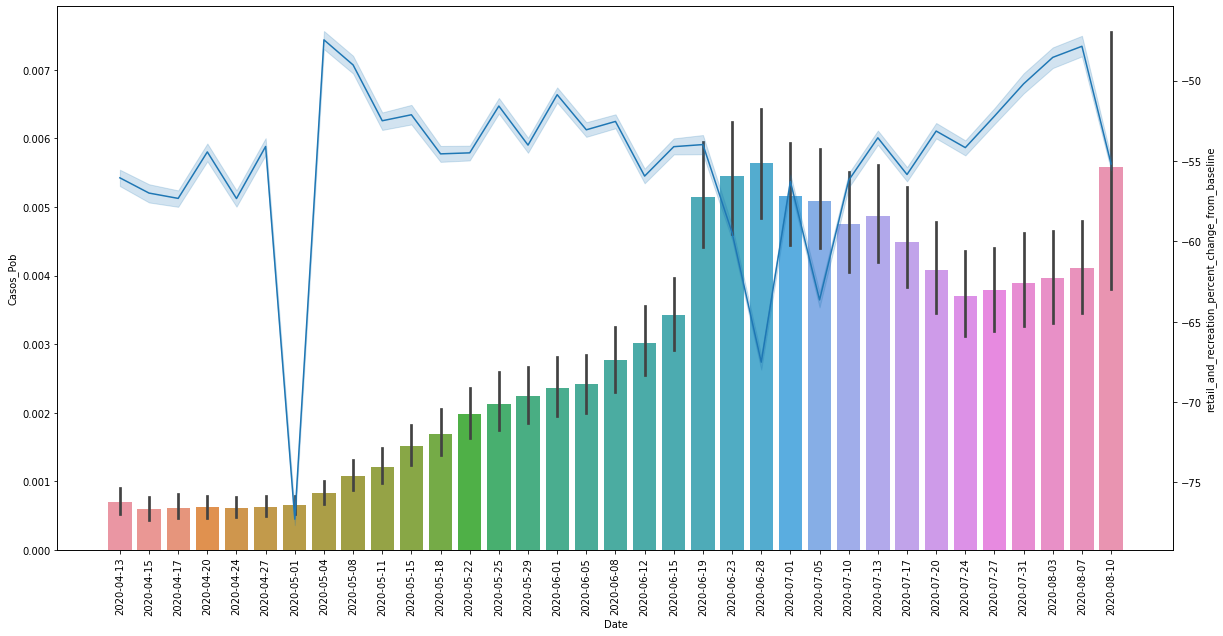

In [100]:
#Existe relacion entre el numero de casos y la movilizacion del pais?
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos_Pob",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="retail_and_recreation_percent_change_from_baseline",data=test1)
plt.show()

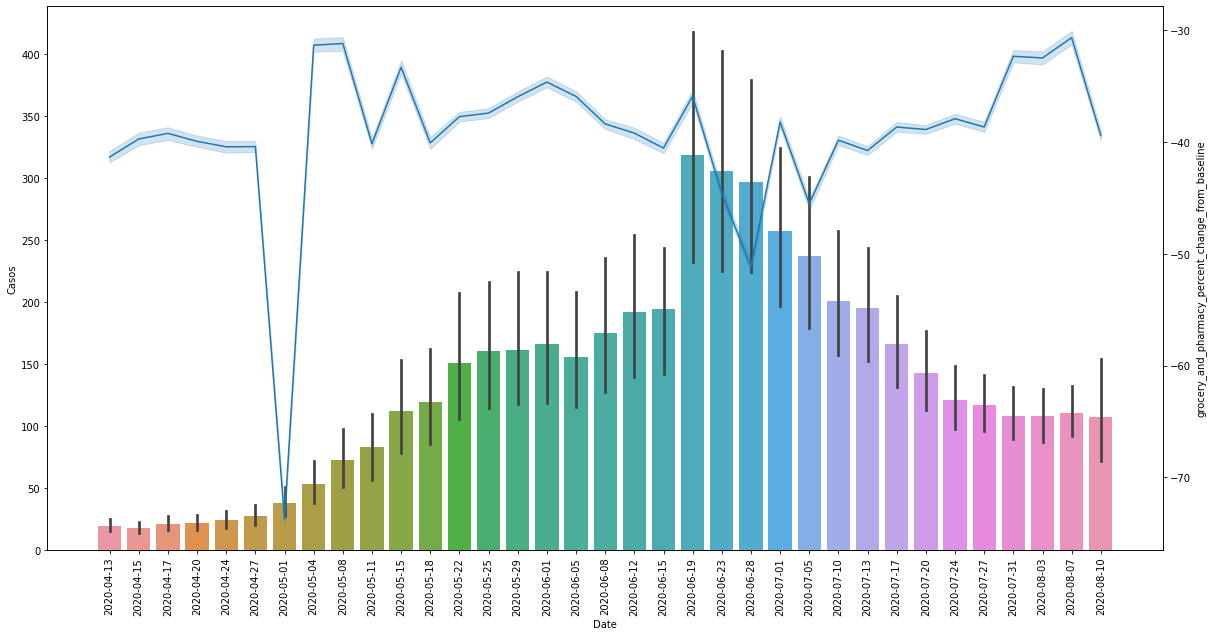

In [101]:
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="grocery_and_pharmacy_percent_change_from_baseline",data=test1)
plt.show()

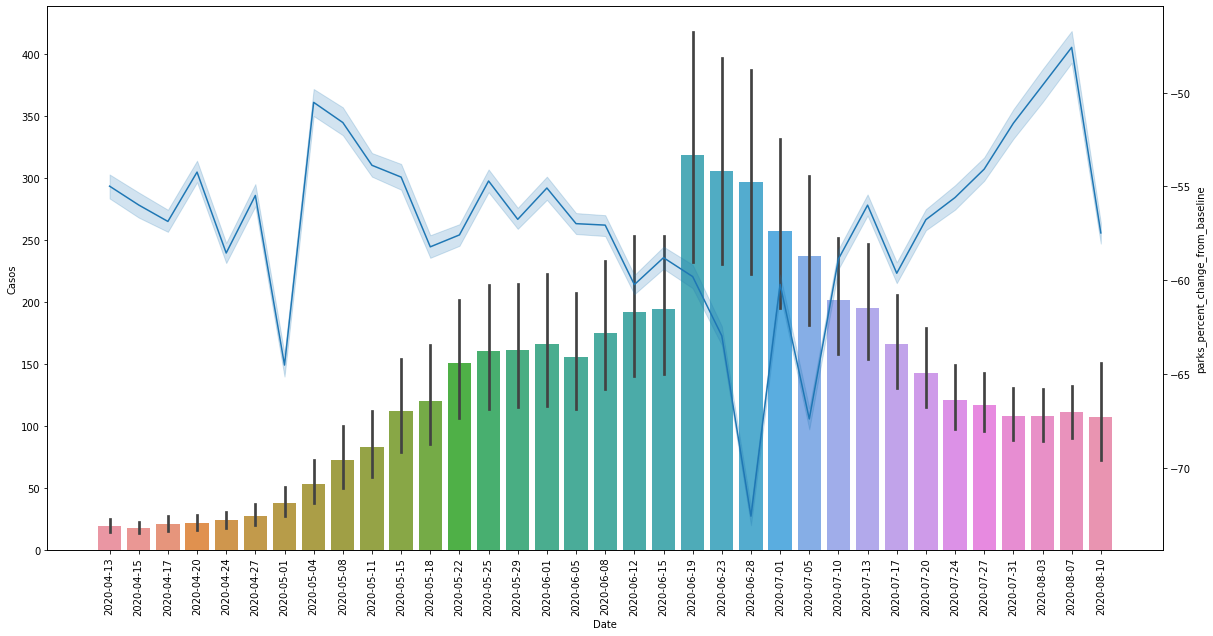

In [102]:
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="parks_percent_change_from_baseline",data=test1)
plt.show()

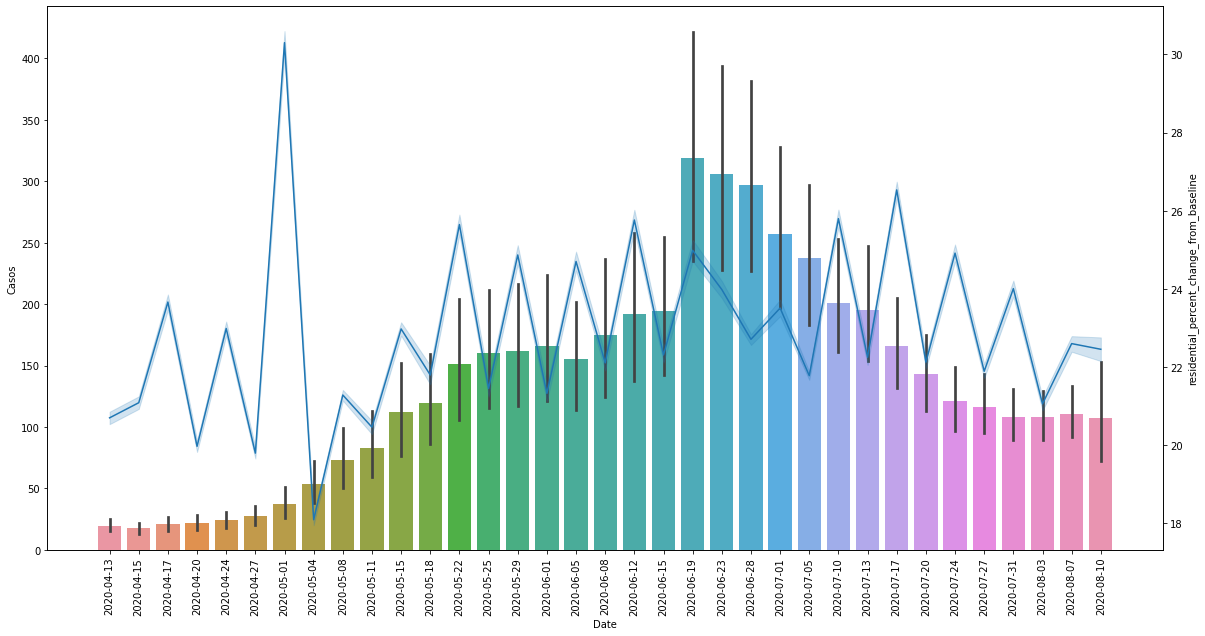

In [103]:
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="residential_percent_change_from_baseline",data=test1)
plt.show()

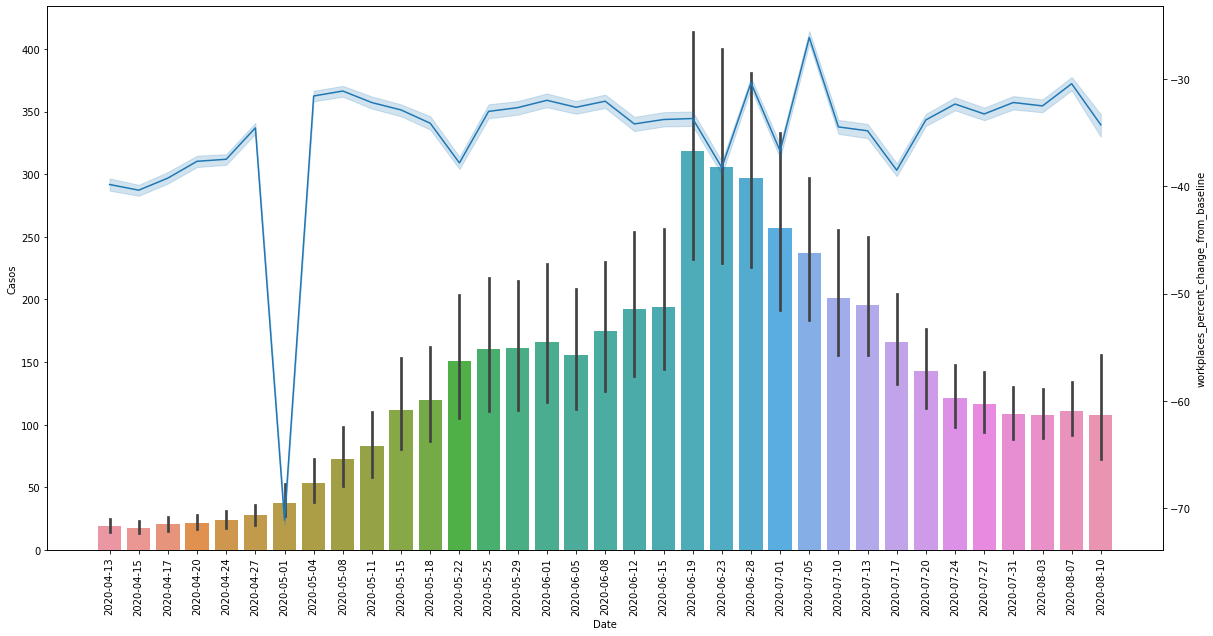

In [104]:
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="workplaces_percent_change_from_baseline",data=test1)
plt.show()

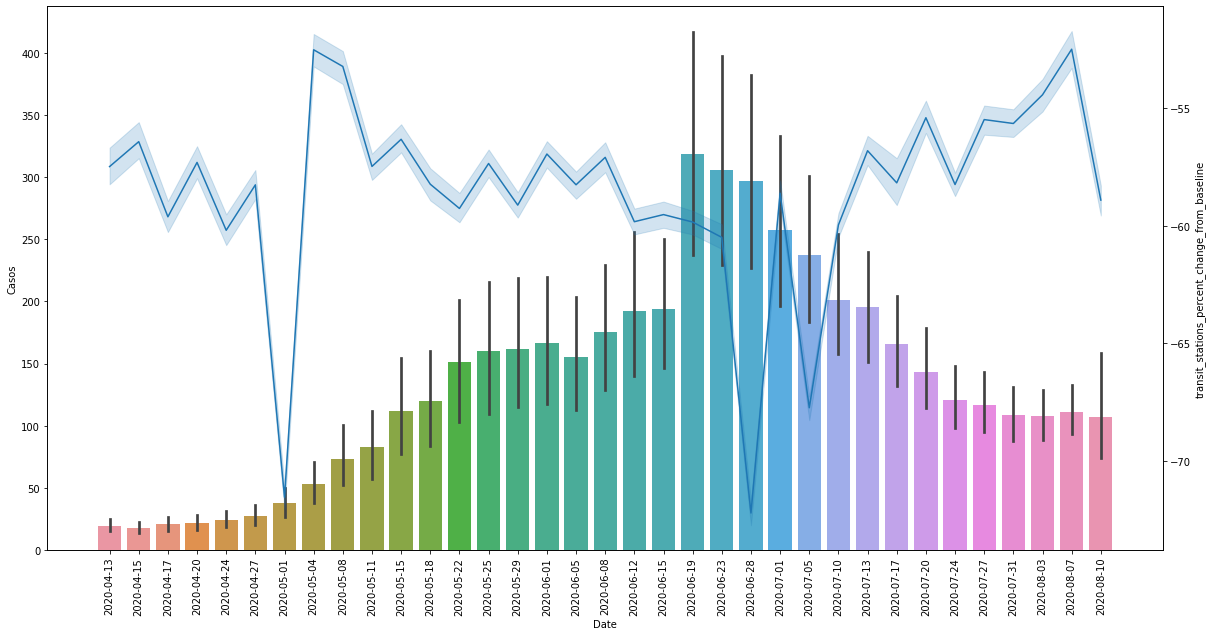

In [105]:
fig,ax=plt.subplots(figsize=(20, 10))
ax1=sns.barplot(x="Date",y="Casos",data=test1)
plt.xticks(rotation=90)
ax2=ax1.twinx()
ax2=sns.lineplot(x="Date",y="transit_stations_percent_change_from_baseline",data=test1)
plt.show()

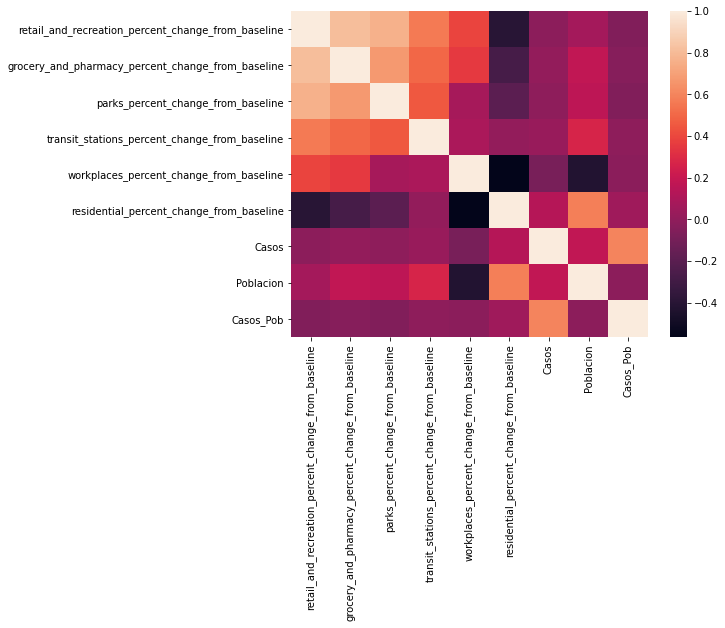

In [106]:
corr=test1.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr)

In [107]:
test1.to_csv("Chilean_data.csv") #Cargar a s3